26145
cellNO= 1  tp=  0 , tn=  72  fp=  0  fn=  5
cellNO= 2  tp=  0 , tn=  165  fp=  0  fn=  5
cellNO= 3  tp=  0 , tn=  257  fp=  0  fn=  5
cellNO= 4  tp=  0 , tn=  305  fp=  0  fn=  54
cellNO= 5  tp=  0 , tn=  391  fp=  0  fn=  64
cellNO= 6  tp=  0 , tn=  466  fp=  0  fn=  64
cellNO= 7  tp=  0 , tn=  554  fp=  0  fn=  64
predict total 358.0
actual total 2056
%  17.412451361867703


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:521: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


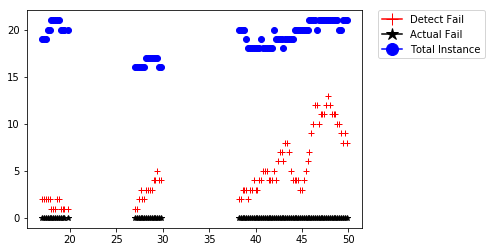

In [1]:
import csv
import math
import random
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt0
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import statistics as s
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from operator import itemgetter
from numpy import *
from xlwt import Workbook
import array as arr


def euc_distance(x1,y1,x2,y2):
    sum = 0
#     print("x1"+ x1)
    sum=math.pow((float(x1)-float(x2)),2)+math.pow((float(y1)-float(y2)),2)
    return math.sqrt(sum)

def read_all_data(filename):
    alldata = []
    with open(filename, 'rt') as f:
        reader= csv.reader(f)
        next(reader)
        for row in reader:
            alldata.append(row)
        return alldata

def reach_dist(row,index,resulta,n_neighbors):
    # index less than n_neigboors
    dist=0.0
    true_distance=0.0
    dist_k=resulta[0][resulta[1][row][index]][n_neighbors-1]
    true_distance=resulta[0][row][index]
    if (dist_k<true_distance):
        return true_distance
    else:
        return dist_k

def lrd(point,resulta,n_neighbors):
    size=len(resulta[1][point]) # aik extra hai is mai n_neigbour=3 hai mean k=2 hai. is mai index 0,1,2 hai to 1 and 2 chaye bus.
    rdSum=0.0
    for i in range (1, size): # 0 index is itself so no needed
        rdSum=rdSum+reach_dist(point,i,resulta,n_neighbors)

    return (size-1)/rdSum
def LOF(point,resulta,n_neighbors):
    nb=len(resulta[1][point])
    lrdSum=0.0
    prdSum=0.0
    for i in range (1, nb):
        lrdSum=lrdSum+lrd(resulta[1][point][i],resulta,n_neighbors)
    
    for j in range (1, nb): # 0 index is itself so no needed
        prdSum=prdSum+reach_dist(point,j,resulta,n_neighbors)
    
#     print("LOF lrd sum =",lrdSum)
#     print("LOF point sum =",prdSum)
    return lrdSum * prdSum


alldata = read_all_data('simulation_data.csv')
# remove_indices = [0,5,7,9,11] # RSRQ =5,7,9,11 0=Time,1=UserID, RSRP4= 4,6,8,10 
print(len(alldata))
# for c in range(0,len(alldata)):
#     alldata[c] = [i for j, i in enumerate(alldata[c]) if j not in remove_indices]

bsdata = read_all_data('basestations.csv')

bscell= []
for elem in range(0,len(bsdata)+1):
    bscell.append([])

    
for k in range(0,len(alldata)):
    fNdist=99999999.9
    secNdist=99999999.9
    thrNdist=99999999.9
    frtNdist=99999999.9
    nbs=99
    for c in range(0,len(bsdata)):
        dist=euc_distance(bsdata[c][1],bsdata[c][2],alldata[k][2],alldata[k][3])
        if(dist<fNdist):
            fNdist=dist
            nbs=bsdata[c][0]

    for c in range(0,len(bsdata)):
        dist=euc_distance(bsdata[c][1],bsdata[c][2],alldata[k][2],alldata[k][3])
        if(dist<secNdist and dist>fNdist):# equal is ignoring may fix it
            secNdist=dist
#             if (alldata[k][6]=="3"):
#             nbs=bsdata[c][0]
#             print("label3")
                    

#     if (alldata[k][6]=="3"):
#         print(alldata[k][1],alldata[k][2],nbs,fNdist,secNdist)
            
    for c in range(0,len(bsdata)):
        dist=euc_distance(bsdata[c][1],bsdata[c][2],alldata[k][2],alldata[k][3])
        if(dist<thrNdist and dist>secNdist):# equal is ignoring may fix it
            thrNdist=dist
            
    for c in range(0,len(bsdata)):
        dist=euc_distance(bsdata[c][1],bsdata[c][2],alldata[k][2],alldata[k][3])
        if(dist<frtNdist and dist>thrNdist):# equal is ignoring may fix it
            frtNdist=dist

#     if (alldata[k][6]=="3"):
#         fNdist=secNdist
    p1=float(alldata[k][4])+(20*(math.log10(fNdist)))
    p2=float(alldata[k][6])+(20*(math.log10(secNdist)))
    p3=float(alldata[k][8])+(20*(math.log10(thrNdist)))
    p4=float(alldata[k][10])+(20*(math.log10(frtNdist)))
    pmean=(p1+p2+p3+p4)/4
    pvar=(math.pow(p1-pmean,2)+math.pow(p2-pmean,2)+math.pow(p3-pmean,2)+math.pow(p4-pmean,2))/4# variance lia howa hai.
    alldata[k].insert(12,pvar)
    
    q1=float(alldata[k][5])#+20*(math.log10(fNdist))
    q2=float(alldata[k][7])#+(20*(math.log10(secNdist)))
    q3=float(alldata[k][9])#+(20*(math.log10(thrNdist)))
    q4=float(alldata[k][11])#+(20*(math.log10(frtNdist)))
#     pmean=(p1+p2+p3+p4)/4
#     pvar=(math.pow(p1-pmean,2)+math.pow(p2-pmean,2)+math.pow(p3-pmean,2)+math.pow(p4-pmean,2))/4
    alldata[k].insert(13,p1+p2+p3+p4)
    alldata[k].insert(14,fNdist)
    
    p1=float(alldata[k][3])
    p2=float(alldata[k][4])
    p3=float(alldata[k][5])
    p4=float(alldata[k][6])
    
#     p1=20*(math.log10(fNdist))
#     p2=(20*(math.log10(secNdist)))
#     p3=(20*(math.log10(thrNdist)))
#     p4=(20*(math.log10(frtNdist)))
    alldata[k].insert(15,q1+q2+q3+q4)
    
#     alldata[k].insert(10,secNdist)
#     alldata[k].insert(11,thrNdist)
    
    bscell[int(nbs)].append(alldata[k]) # bscell[0] no instance

# write output file of workbook
# wb=Workbook()
# sheet1=wb.add_sheet('Sheet 1')
# sheet1.col(0).width=7000
# r=0
# for cellNo in range(1,8):
#     wbsc=sorted(bscell[cellNo],key=lambda x: x[0])
#     wbsc=sorted(wbsc,key=lambda x: x[14])
#     remove_indices = [1,2,3,4,5,6,7,8,9,10,11,14] # 0=UserID, 1=locatX ,2=locationy, 3=RSRP1,4=RSRQ1,5=RSRP2,6=Distance,7=label
#             # alldata[0] = [i for j, i in enumerate(alldata[0]) if j not in remove_indices]
#     for c in range(0,len(wbsc)):
#         wbsc[c] = [i for j, i in enumerate(wbsc[c]) if j not in remove_indices]
    
#     for row in range(0,len(wbsc)):
#         tstemp=float(wbsc[row][0])
#           #  print("r+row = ",r+row," r =",r ," row =",row)
#         if((tstemp < 7.0) or ((tstemp >= 10.0)and(tstemp < 17.0))or ((tstemp >= 20.0)and(tstemp < 27.0)) or((tstemp >= 30.0)and(tstemp< 37.0)) ): #10 k table per divide ker k remainder lai le.
#             r=r-1
#     #         print("Trai = ",deci)
#         else:
#             for col in range(0,len(wbsc[0])):
#                 sheet1.write(row+r,col,wbsc[row][col])#trainData.append(bsc[i])
#                 #testData.append(bsc[i])
            
#     r=r+len(wbsc)
    
# wb.save('allTestdataCell.xls')
# end write of output file

tp=0
fp=0
tn=0
fn=0
for cellNo in range(1,8):#1,8
    trainData=[]
    testData=[]
    bsc=sorted(bscell[cellNo],key=lambda x: x[0])# sorted base on time stamps
#     print("bsc[0] = ",bsc[0])
    #time stamp 0.2 to 4.8
    for i in range(0,len(bsc)):
    #     deci = float(bsc[i][0])%10 # modulas remainder
    #     print("deci = ",deci)
        tstemp= float(bsc[i][0])
        if((tstemp < 7.0) or ((tstemp >= 10.0)and(tstemp < 17.0))or ((tstemp >= 20.0)and(tstemp < 27.0)) or((tstemp >= 30.0)and(tstemp< 37.0)) ): #10 k table per divide ker k remainder lai le.
            trainData.append(bsc[i])
    #         print("Trai = ",deci)
        else:
            testData.append(bsc[i])
    #         print("test = ",tstemp)

    trainSize=len(trainData)
    testSize=len(testData)
    trainData=sorted(trainData,key=lambda x: x[14]) 
    testData=sorted(testData,key=lambda x: x[14])

    bsc=sorted(bscell[cellNo],key=lambda x: x[14]) # Instance belong to base station 1 data sorted on distance. sorted base on x[this column]
    sLen=int(len(bsc)/20) # Testing on 1st bin out of 5 bins
    count=0
#     print("sLen = ",sLen)
#     print("bsc len = ",len(bsc))

    binxy=[]
    binlabelTrain=[]
    binlabelTest=[]
    bintestData=[] # previously lab3Data veriable name
    bintestDataxy=[]
    bintrainData=[]
    labClNo=len(bsc[0])-1
#     print("label class column no",labClNo)

    plotresult={}
    binS=0 # bin start point
    binE=19 # bin end point
    for m in range (0,19):# all 20 if upper limit 19 0,19
        binS=m
        binE=m+1

        binxy=[]
        binlabelTrain=[]
        binlabelTest=[]
        bintestData=[] # previously lab3Data veriable name
        bintestDataxy=[]
        bintrainData=[]
    #     print("binS = ",binS)
    #     print("binE = ",binE)

    #     print("start ",m," = ",sLen*binS)
    #     print("end ",m," = ",sLen*binE)
        mind1= bsc[sLen*binS][14]
        maxd1= bsc[sLen*binE][14]
        for i in range(0,len(trainData)):
            if ((trainData[i][14]>=mind1)and(trainData[i][14]<=maxd1)):
                bintrainData.append(trainData[i])
    #             binlabelTrain.append(np.nan_to_num(int(trainData[i][labClNo])))

        for i in range(0,len(testData)):
            if ((testData[i][14]>=mind1)and(testData[i][14]<=maxd1)):
                bintestData.append(testData[i])
    #             binlabelTest.append(np.nan_to_num(int(trainData[i][labClNo])))

        remove_indices = [1,2,3,4,5,6,7,8,9,10,11,14] # 0=UserID, 1=locatX ,2=locationy, 3=RSRP1,4=RSRQ1,5=RSRP2,6=Distance,7=label
        # alldata[0] = [i for j, i in enumerate(alldata[0]) if j not in remove_indices]
        for c in range(0,len(bintrainData)):
            bintrainData[c] = [i for j, i in enumerate(bintrainData[c]) if j not in remove_indices]

        for c in range(0,len(bintestData)):
            bintestData[c] = [i for j, i in enumerate(bintestData[c]) if j not in remove_indices]

        for c in range(0,len(bintrainData)):
            binxy.append([np.nan_to_num(float(bintrainData[c][0])),np.nan_to_num(float(bintrainData[c][1])),np.nan_to_num(float(bintrainData[c][2])),np.nan_to_num(float(bintrainData[c][3]))])
            binlabelTrain.append(np.nan_to_num(int(bintrainData[c][4])))
            
    
            
        for c in range(0,len(bintestData)):
            bintestDataxy.append([np.nan_to_num(float(bintestData[c][0])),np.nan_to_num(float(bintestData[c][1])),np.nan_to_num(float(bintestData[c][2])),np.nan_to_num(float(bintestData[c][3]))])
            binlabelTest.append(np.nan_to_num(int(bintestData[c][4])))

        n_neighbors=10 # value of k=3 in knn
        # classifier = KNeighborsClassifier(n_neighbors)
        neigh = KNeighborsClassifier(n_neighbors)
    #     ct=0
        testDatalof=[]
        z=[]
#         print("binxy = ",binxy[0])
        for c in range(0,len(bintestDataxy)):
            binxy.append([np.nan_to_num(float(bintestDataxy[c][0])),np.nan_to_num(float(bintestDataxy[c][1])),np.nan_to_num(float(bintestDataxy[c][2])),np.nan_to_num(float(bintestDataxy[c][3]))])
            binlabelTrain.append(binlabelTest[c]) # class 3 manual add for current instance
            neigh.fit(binxy, binlabelTrain)
            knnML=neigh.kneighbors(binxy,n_neighbors,True)
            # 0 index for distance matrix if true above parameter
            #1 index for index no. of second nearest neigbour
    #     print(xy[len(xy)-1],label[len(label)-1])
            lofv=LOF(len(binxy)-1,knnML,n_neighbors) # c is any point
            z.append(lofv)
            testDatalof.append([np.nan_to_num(float(bintestDataxy[c][0])),np.nan_to_num(float(bintestDataxy[c][1])),np.nan_to_num(float(bintestDataxy[c][2])),np.nan_to_num(float(bintestDataxy[c][3])),lofv,binlabelTest[c]])
        #     print("LOF = ",lofv)
            del binxy[-1]
            del binlabelTrain[-1]
        #     print(xy[len(xy)-1],label[len(label)-1])
    #         if(lofv>7.0):
    #             ct=ct+1

        trainlof=[] #lab012lof
        for c in range(0,len(binxy)):
            neigh.fit(binxy, binlabelTrain)
            knnML=neigh.kneighbors(binxy,n_neighbors,True)
            lofv=LOF(c,knnML,n_neighbors)
            trainlof.append(lofv)

        for c in range(0,len(binxy)):
            binxy[c].append(trainlof[c]) # LOF for trained data is zero
            binxy[c].append(binlabelTrain[c])

        z=trainlof # z remove from here because it was test data
    # print(z)

        zmean=s.mean(z)
        zSD=s.stdev(z)
        zmax=max(z)
        zmin=min(z)
#         print("First standard deviation",zSD)
#         print("0.01 standard deviation",0.01*zSD)
        for c in range(0,len(testDatalof)): # replace lofv with normalize values
            testDatalof[c][4]= (testDatalof[c][4]-zmean)/zSD

        zcount=0
        zlab3c=0 # instance of label 3 in lofv in result after normalizse
        for c in range(0,len(testDatalof)):
            if (testDatalof[c][4]>(zSD*0.1)):
                temp=[]
                tempkey =float(testDatalof[c][0])
    #             print("timeS = ",testDatalof[c][0],"z-lofv = ", testDatalof[c][4], " label = ",testDatalof[c][5])
                if (testDatalof[c][5]==array(3)):
                    zlab3c=zlab3c+1
                zcount=zcount+1
                if tempkey in plotresult:# if key in dicrionary    work like has_key
    #                 tval=plotresult[tempkey]
    #                 print("tval = ",tval)
                    plotresult[tempkey][0]=plotresult[tempkey][0]+1
                    if (testDatalof[c][5]==array(3)):
                       plotresult[tempkey][1]=plotresult[tempkey][1]+1
    #                  plotresult[tempkey]=tval
                else:
                    if (testDatalof[c][5]==array(3)):
                        temp=[1,1]#zcount, zlab3c respectivley
                    else:
                        temp=[1,0]
                    plotresult[tempkey]=temp # insert array of zcount, zlab3c

#         print("lof point after z-score threshold = ",zcount)
#         print("label 3 class instance after threshold = " , zlab3c)
    #     timeStamp.append(float(testDatalof[c][0]))
    #     predicted.append(zcount)
    #     actual.append(zlab3c)




        # # plot circles with radius proportional to the outlier scores

#         print("sLen = ",sLen)
    #     print("ct = ", ct)
    # print(bintestData)

    #     print("bsc d1 start = ",bsc[sLen*binS][14])
    #     print("bsc d1 end = ",bsc[sLen*binE][14])
    # for i in range(0,len(plotresult)):
    # print(plotresult)
    # print("items = ",plotresult.items())
    a = []
    x=[]
    # a = arr.array('d', [1.1, 3.5, 4.5])
    for i in plotresult.keys(): # here i is key
        pc,ac = map(float, plotresult[i])
        a.append([float(i),float(pc),float(ac)])
#         if (pc!=0 or ac!=0): #predict v1=predict outage v2=outage labeled class3
#             if (pc>0 and ac>0): # on this timestamp ac>0 if class 3 found and pc>0 if predicted any
#                 tp=tp+1
#             if (pc==0 and ac==0):
#                 tn=tn+1
#             if (pc>0 and ac==0):
#                 fp=fp+1
#             if (pc==0 and ac>0):
#                 fn=fn+1


    m=array(a)
    # print("value",key,v1,v2)
    # plt.plot(m[:,0], m[:,1], 'r+',m[:,0], m[:,2], 'k*')
    # plt.show()

    asort=sorted(a,key=lambda x: x[0]) # sort base on time stamp
    pt=0 #predict total
    at=0 #actual total
    sparsept=[]
    attestData={}
    for i in range(0,len(asort)):
        if (asort[i][0]>=40.0):
            pt= pt+asort[i][1] #all user 3 or not 3sparsept
            sparsept.append(asort[i]) # use it for next plot it is only taking last 40 is liye 2n plot mai start wala nahi aa raha hai.
    for i in range(0,len(testData)):
    #     if (float(testData[i][0])>=40.0):
            at= at+1 #all user 3 or not 3
            key=float(testData[i][0])
            if key in attestData:
                attestData[key]=attestData[key]+1
            else:
                attestData[key]=1

    for i in plotresult.keys(): # here i is key
        v1 = attestData[i]
        x.append([float(i),float(v1)])
        pc,ac = map(float, plotresult[i])
        smooth= 0.90 * v1
        if (pc!=0 or ac!=0): #predict v1=predict outage v2=outage labeled class3
            if (pc>=smooth and ac>0): # on this timestamp ac>0 if class 3 found and pc>0 if predicted any
                tp=tp+1
            if (pc<smooth and ac==0):
                tn=tn+1
            if (pc>=smooth and ac==0):
                fp=fp+1
            if (pc<smooth and ac>0):
                fn=fn+1
    #" pc = ",pc, " ac=",ac,
    print("cellNO=",cellNo," tp= ",tp,", tn= ",tn," fp= ",fp," fn= ",fn)
    
print("predict total",pt)
print("actual total",at)
print("% ",(pt/at)*100)
x=array(x)
l0=plt0.plot(m[:,0], m[:,1], 'r+', label='Detect Fail')
l1=plt1.plot(m[:,0], m[:,2], 'k*', label='Actual Fail')
l2=plt2.plot(x[:,0], x[:,1],'bo', label='Total Instance')
class0 = mlines.Line2D([],[], color='r', marker='+',markersize=12, label='Detect Fail')
class1 = mlines.Line2D([],[], color='k', marker='*',markersize=12, label='Actual Fail')
class2 = mlines.Line2D([],[], color='b', marker='o',markersize=12, label='Total Instance')
plt4.legend([l0,l1,l2],handles=[class0,class1,class2],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
axes = plt4.gca()
# axes.set_xlim([max(m[:, 0]),min(m[:, 0])])

# axes.set_ylim([min(m[:, 0]),max(m[:, 1])])

plt4.show() # this plot is shwoing only last cell.